In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from Excel
file_path = '/content/CensusAges.xlsx'
df = pd.read_excel(file_path)



In [ ]:
# Define age groups for aggregation
age_bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99, 110]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']


In [ ]:
# Add a new column for age groups
df['Age Group'] = pd.cut(df['x Age'], bins=age_bins, labels=age_labels, right=False)

KeyError: 'x Age'

In [ ]:
# Aggregate the number of survivors by Province, Age Group, and Gender
age_group_survivors = df.groupby(['Province', 'Age Group', 'Gender'])['lx Number of survivors'].sum().reset_index()

# Filter for age groups likely to buy life insurance (30-39 and 40-49)
likely_buyers = age_group_survivors[age_group_survivors['Age Group'].isin(['30-39', '40-49'])]


KeyError: 'Province'

In [ ]:
# Sum survivors in each province for likely buyers
province_likely_buyers = likely_buyers.groupby(['Province', 'Age Group'])['lx Number of survivors'].sum().reset_index()


<ipython-input-7-f7baab6ce171>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  province_likely_buyers = likely_buyers.groupby(['Province', 'Age Group'])['lx Number of survivors'].sum().reset_index()


In [ ]:
# Sort by the number of survivors
province_likely_buyers_sorted = province_likely_buyers.sort_values(by='lx Number of survivors', ascending=False)


In [ ]:
# Display top results
print(province_likely_buyers_sorted.head())

                     Province Age Group  lx Number of survivors
72                     Quebec     30-39            1.975329e+06
52                Nova Scotia     30-39            1.967291e+06
62                    Ontario     30-39            1.966646e+06
32              New Brunswick     30-39            1.962614e+06
42  Newfoundland and Labrador     30-39            1.962476e+06


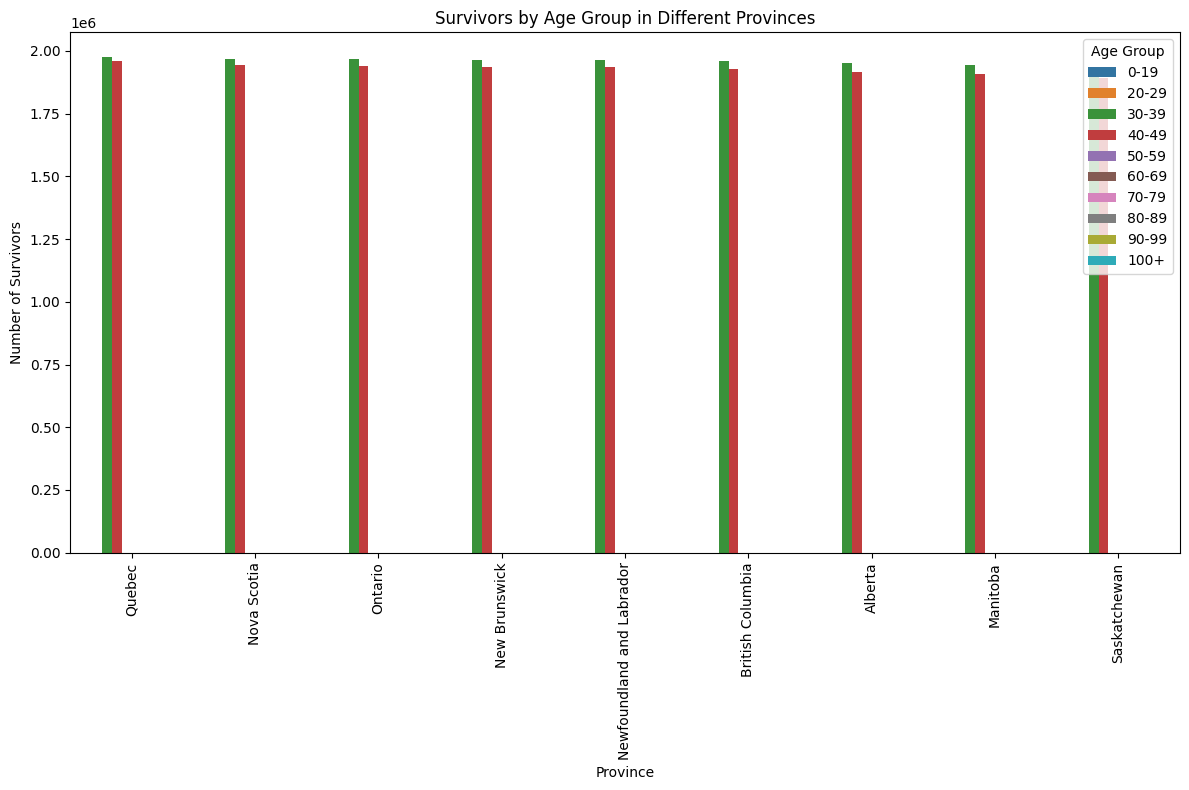

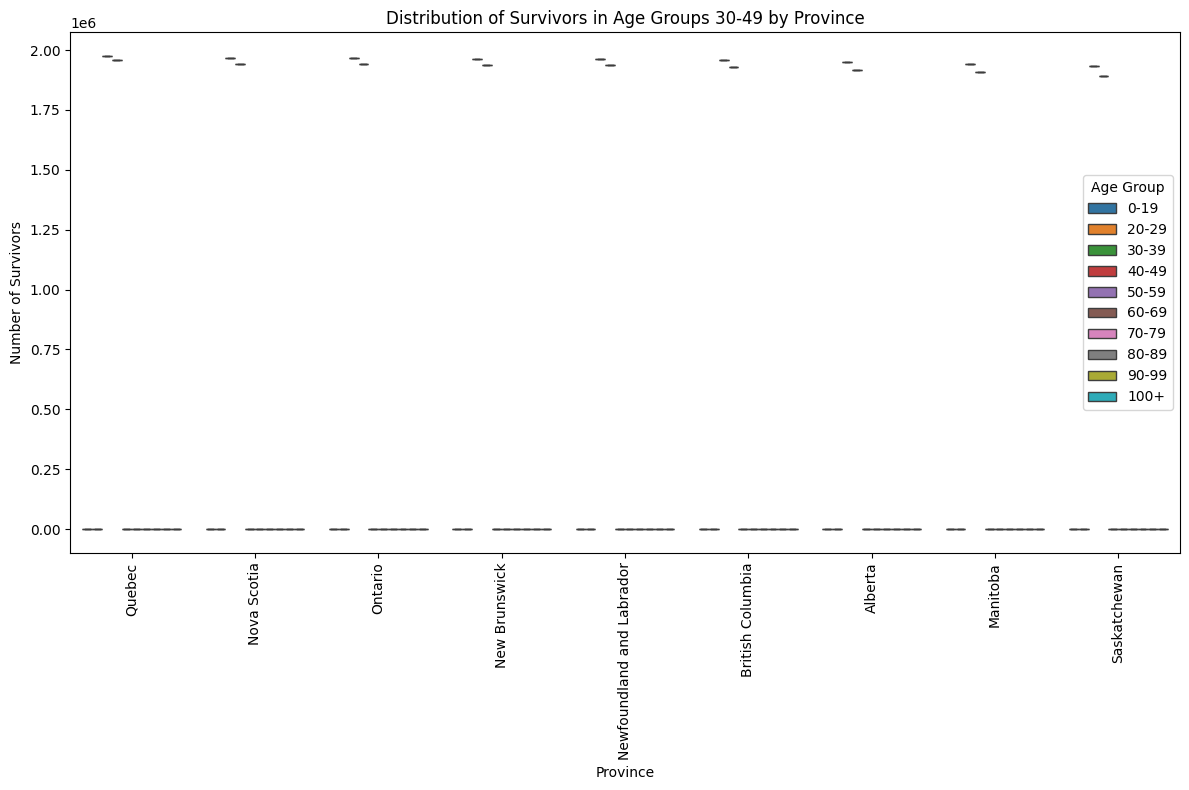

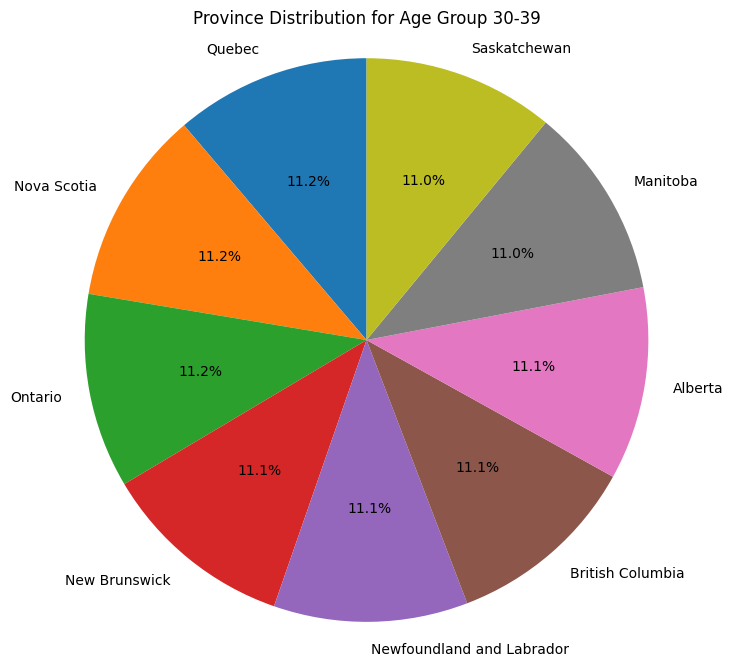

In [ ]:
# -------------------- EDA Visualizations --------------------

# Plotting the distribution of survivors by age group for each province
plt.figure(figsize=(12, 8))
sns.barplot(x='Province', y='lx Number of survivors', hue='Age Group', data=province_likely_buyers_sorted)
plt.xticks(rotation=90)
plt.title('Survivors by Age Group in Different Provinces')
plt.ylabel('Number of Survivors')
plt.xlabel('Province')
plt.tight_layout()
plt.show()

# Visualize the age group distribution across different provinces for the likely buyers (30-49)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Province', y='lx Number of survivors', hue='Age Group', data=province_likely_buyers_sorted)
plt.xticks(rotation=90)
plt.title('Distribution of Survivors in Age Groups 30-49 by Province')
plt.ylabel('Number of Survivors')
plt.xlabel('Province')
plt.tight_layout()
plt.show()

# Pie chart to visualize the province distribution of the 30-39 age group
thirty_thirtynine = province_likely_buyers_sorted[province_likely_buyers_sorted['Age Group'] == '30-39']

plt.figure(figsize=(8, 8))
plt.pie(thirty_thirtynine['lx Number of survivors'], labels=thirty_thirtynine['Province'], autopct='%1.1f%%', startangle=90)
plt.title('Province Distribution for Age Group 30-39')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


<ipython-input-11-1284ef2b4703>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mortality_rate_group = df.groupby(['Province', 'Age Group'])['Mortality Rate'].mean().reset_index()


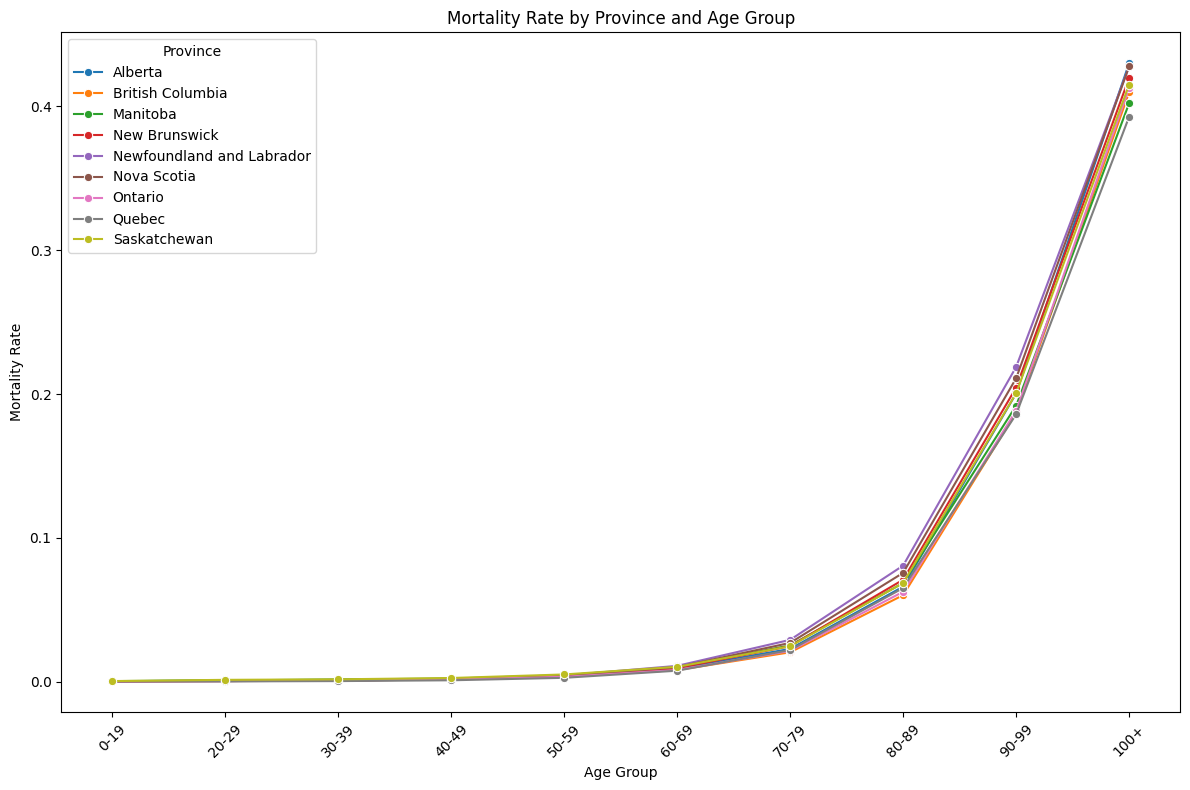

In [ ]:
# Calculate mortality rate (dx / lx) for each province and age group
df['Mortality Rate'] = df['dx Number of deaths'] / df['lx Number of survivors']

# Aggregate the mortality rates by province and age group
mortality_rate_group = df.groupby(['Province', 'Age Group'])['Mortality Rate'].mean().reset_index()

# Visualize mortality rate by province and age group
plt.figure(figsize=(12, 8))
sns.lineplot(data=mortality_rate_group, x='Age Group', y='Mortality Rate', hue='Province', marker="o")
plt.xticks(rotation=45)
plt.title('Mortality Rate by Province and Age Group')
plt.ylabel('Mortality Rate')
plt.tight_layout()
plt.show()


<ipython-input-12-0c170e643639>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivor_gender = df.groupby(['Province', 'Age Group', 'Gender'])['lx Number of survivors'].sum().reset_index()


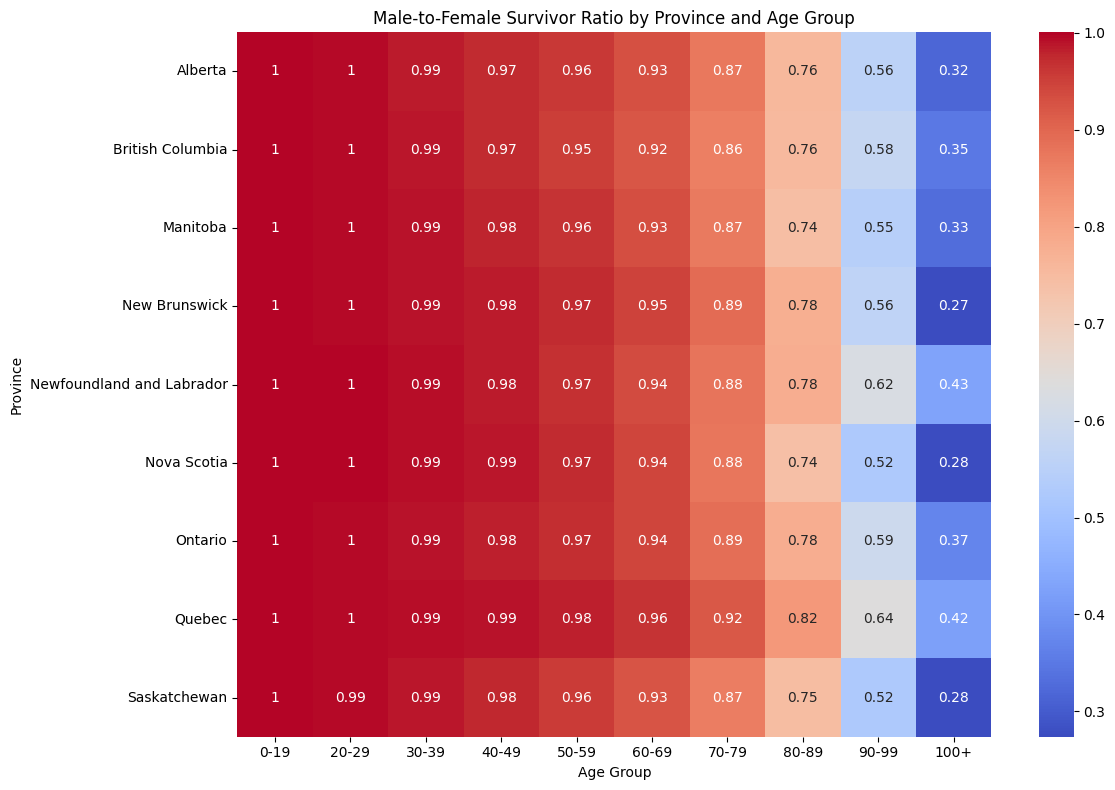

In [ ]:
# Aggregate the number of survivors by gender and province
survivor_gender = df.groupby(['Province', 'Age Group', 'Gender'])['lx Number of survivors'].sum().reset_index()

# Pivot table for male vs female survivor comparison
pivot_gender = survivor_gender.pivot_table(index=['Province', 'Age Group'], columns='Gender', values='lx Number of survivors')

# Calculate the male-to-female survivor ratio
pivot_gender['M/F Ratio'] = pivot_gender['M'] / pivot_gender['F']

# Visualize the male-to-female ratio across provinces
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_gender['M/F Ratio'].unstack(level=1), cmap='coolwarm', annot=True)
plt.title('Male-to-Female Survivor Ratio by Province and Age Group')
plt.ylabel('Province')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()


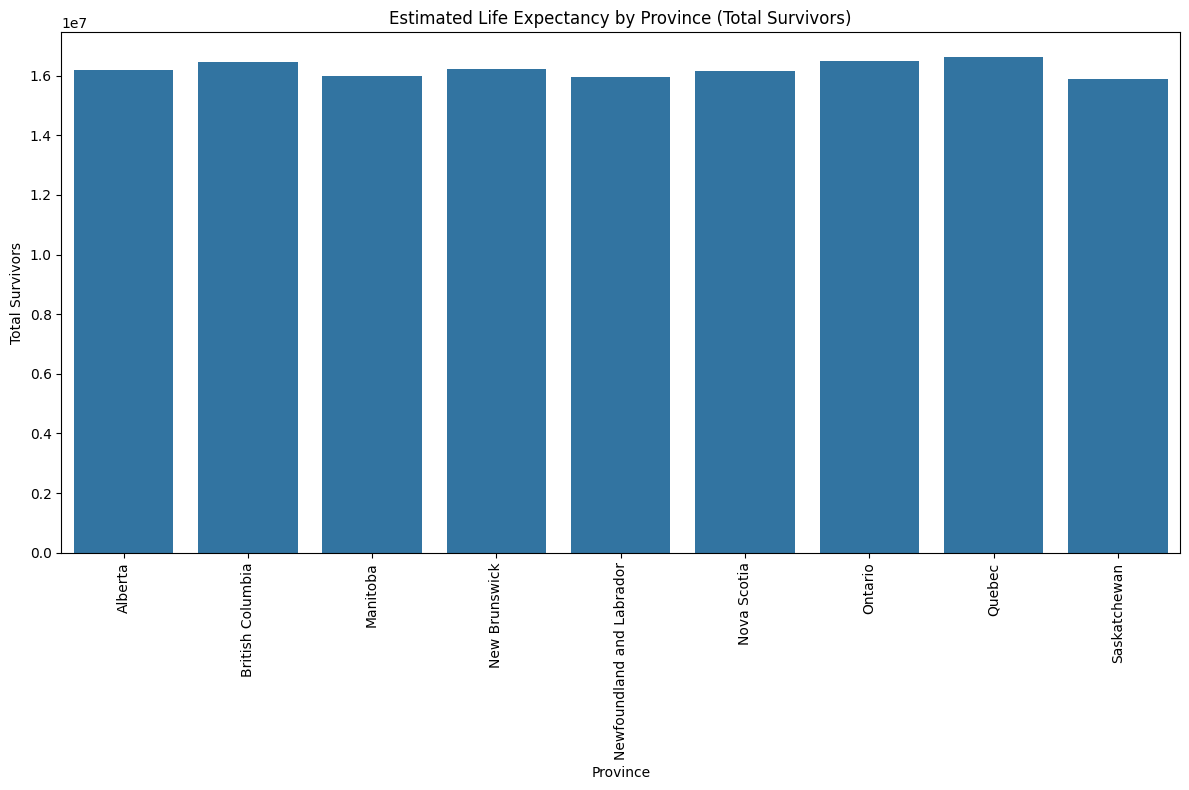

In [ ]:
# Estimate life expectancy by summing up the probabilities of survival at each age
life_expectancy = df.groupby(['Province'])['lx Number of survivors'].sum().reset_index()
life_expectancy.columns = ['Province', 'Total Survivors']

# Plotting life expectancy by province
plt.figure(figsize=(12, 8))
sns.barplot(x='Province', y='Total Survivors', data=life_expectancy)
plt.xticks(rotation=90)
plt.title('Estimated Life Expectancy by Province (Total Survivors)')
plt.ylabel('Total Survivors')
plt.xlabel('Province')
plt.tight_layout()
plt.show()


<ipython-input-14-f35fc1635706>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  premium_suggestion = df.groupby(['Province', 'Age Group'])['Premium Suggestion'].mean().reset_index()


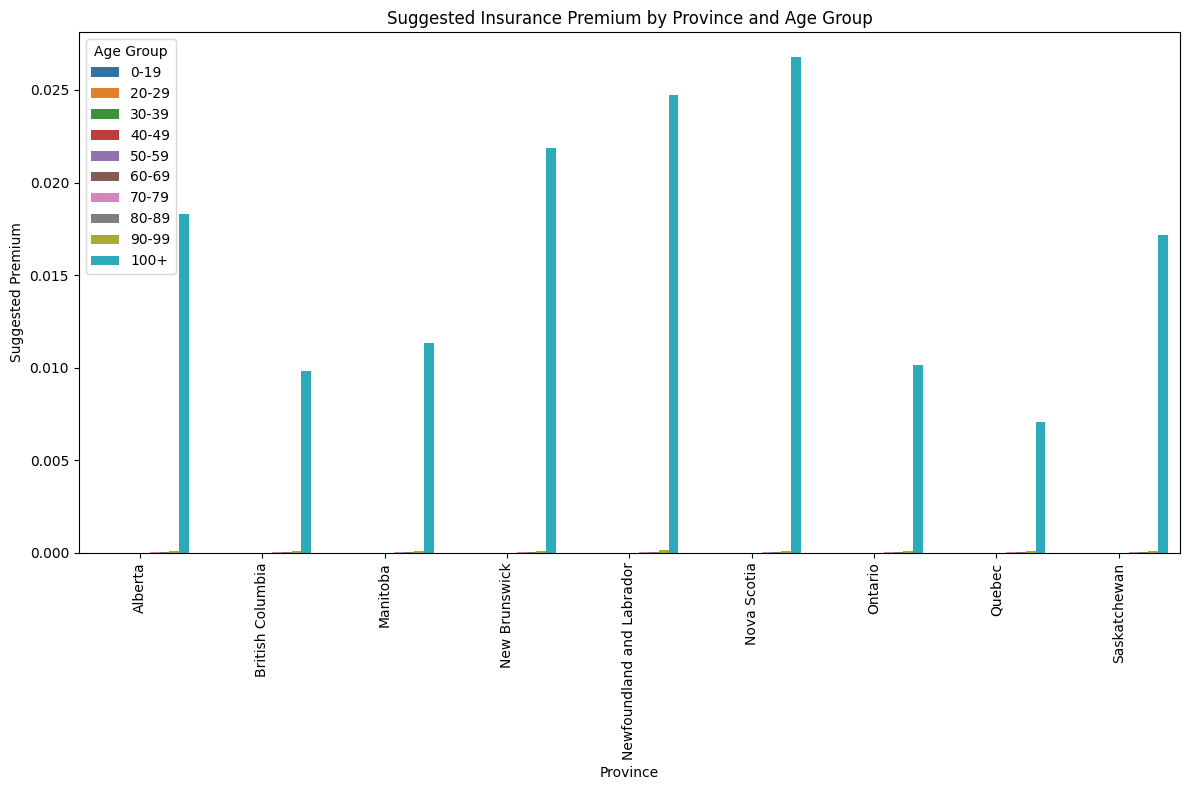

In [ ]:
# Assume that insurance premium is inversely related to life expectancy
# Create a simple premium calculation based on the inverse of total survivors
df['Premium Suggestion'] = 1 / df['lx Number of survivors']

# Aggregate the suggested premium by province and age group
premium_suggestion = df.groupby(['Province', 'Age Group'])['Premium Suggestion'].mean().reset_index()

# Visualize the suggested premiums
plt.figure(figsize=(12, 8))
sns.barplot(x='Province', y='Premium Suggestion', hue='Age Group', data=premium_suggestion)
plt.xticks(rotation=90)
plt.title('Suggested Insurance Premium by Province and Age Group')
plt.ylabel('Suggested Premium')
plt.tight_layout()
plt.show()


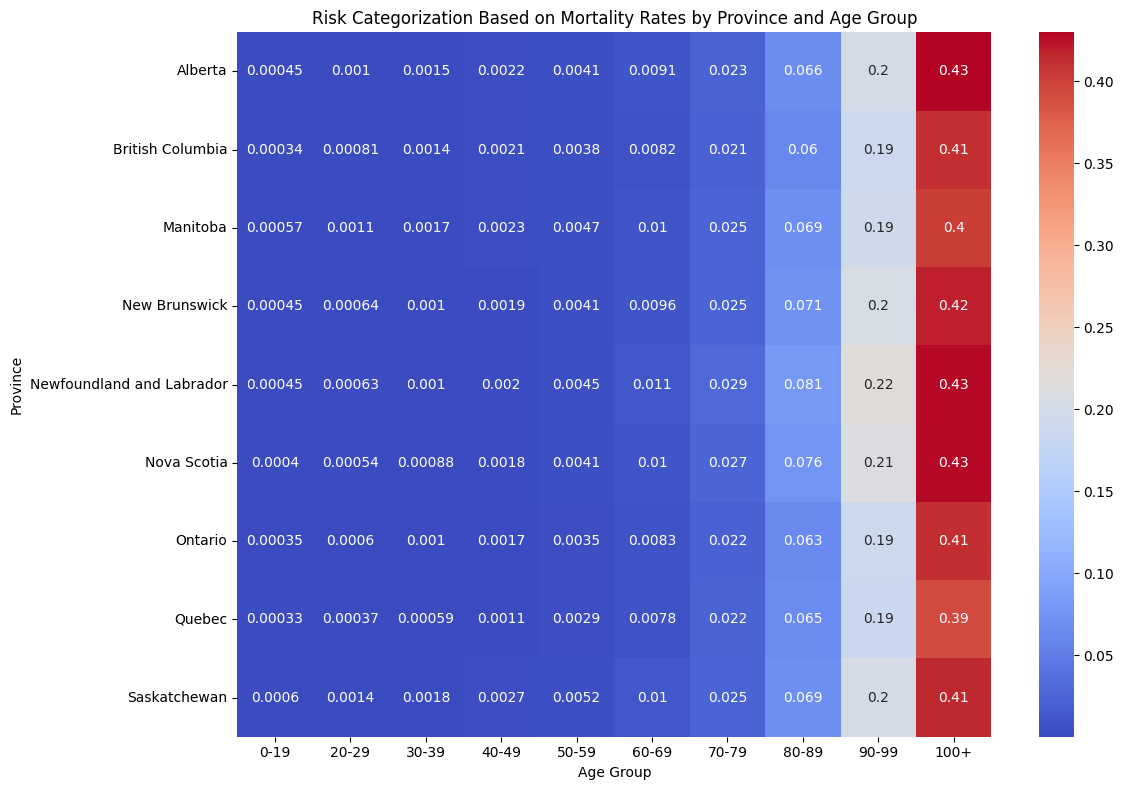

In [ ]:
# Correcting the FutureWarning by specifying `observed=False` in groupby
mortality_risk = df.groupby(['Province', 'Age Group'], observed=False)['Mortality Rate'].mean().reset_index()

# Correcting the use of pivot for heatmap
mortality_risk_pivot = mortality_risk.pivot(index='Province', columns='Age Group', values='Mortality Rate')

# Visualize the risk categories by province and age group using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(mortality_risk_pivot, annot=True, cmap='coolwarm')
plt.title('Risk Categorization Based on Mortality Rates by Province and Age Group')
plt.ylabel('Province')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()


<ipython-input-17-f5cf4898bb1e>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_estimation = df.groupby(['Province', 'Age Group'])['Expected Profit'].sum().reset_index()


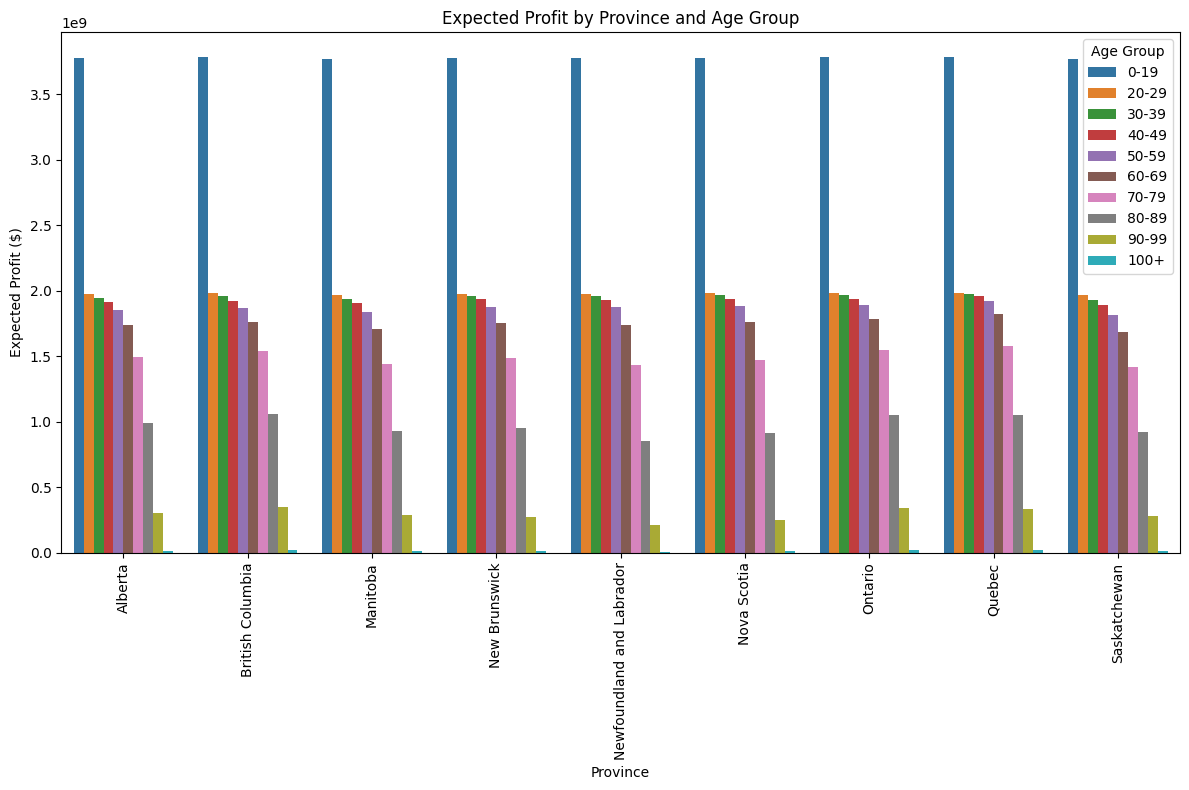

        Province Age Group  Expected Profit
0        Alberta      0-19     3.776294e+09
1        Alberta     20-29     1.972829e+09
2        Alberta     30-39     1.947350e+09
3        Alberta     40-49     1.912838e+09
4        Alberta     50-59     1.855232e+09
..           ...       ...              ...
85  Saskatchewan     60-69     1.681611e+09
86  Saskatchewan     70-79     1.420431e+09
87  Saskatchewan     80-89     9.227623e+08
88  Saskatchewan     90-99     2.766970e+08
89  Saskatchewan      100+     1.468774e+07

[90 rows x 3 columns]


In [ ]:
# Assume a fixed premium for simplicity (e.g., $1000 per person)
premium_per_person = 1000

# Calculate Expected Payouts: (Probability of death * lx Number of survivors)
df['Expected Payout'] = df['qx  (probability of death)'] * df['lx Number of survivors'] * premium_per_person

# Calculate Premium Income: (Survivors * Premium per person)
df['Premium Income'] = df['lx Number of survivors'] * premium_per_person

# Calculate Expected Profit: (Premium Income - Expected Payout)
df['Expected Profit'] = df['Premium Income'] - df['Expected Payout']

# Aggregate Expected Profit by province and age group
profit_estimation = df.groupby(['Province', 'Age Group'])['Expected Profit'].sum().reset_index()

# Visualize the expected profit by province and age group
plt.figure(figsize=(12, 8))
sns.barplot(x='Province', y='Expected Profit', hue='Age Group', data=profit_estimation)
plt.xticks(rotation=90)
plt.title('Expected Profit by Province and Age Group')
plt.ylabel('Expected Profit ($)')
plt.tight_layout()
plt.show()

# Print the profit estimation table
print(profit_estimation)
